In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [ ]:
img_width = 64
img_height = 64

train_data_dir = '/content/drive/MyDrive/TrainingSet/Old_DataSet _PP/Old_Classification/Train'
validation_data_dir = '/content/drive/MyDrive/TrainingSet/Old_DataSet _PP/Old_Classification/Validation'

train_samples = 30
validation_samples = 15
epochs = 50
batch_size = 4

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:

model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

#normal + cancer in train

Found 296 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'cancer': 0, 'normal': 1}


In [ ]:
imgs, labels = next(train_generator)

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

4
0.0


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


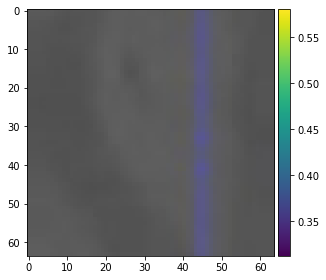

1.0


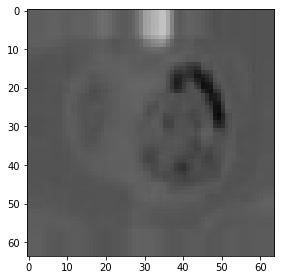

1.0


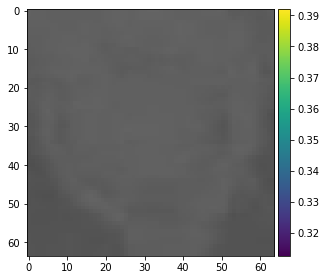

1.0


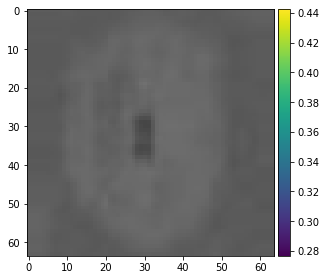

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 96 images belonging to 2 classes.


In [ ]:
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=train_samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=validation_samples // batch_size)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
30/30 [==============================] - 82s 1s/step - loss: 0.7032 - accuracy: 0.4382 - val_loss: 0.6954 - val_accuracy: 0.4167
Epoch 2/50
30/30 [==============================] - 22s 733ms/step - loss: 0.6913 - accuracy: 0.5770 - val_loss: 0.6932 - val_accuracy: 0.5167
Epoch 3/50
30/30 [==============================] - 12s 398ms/step - loss: 0.6903 - accuracy: 0.5225 - val_loss: 0.6916 - val_accuracy: 0.5500
Epoch 4/50
30/30 [==============================] - 7s 230ms/step - loss: 0.6939 - accuracy: 0.4920 - val_loss: 0.6933 - val_accuracy: 0.4500
Epoch 5/50
30/30 [==============================] - 3s 99ms/step - loss: 0.6897 - accuracy: 0.5092 - val_loss: 0.6892 - val_accuracy: 0.5167
Epoch 6/50
30/30 [==============================] - 2s 44ms/step - loss: 0.6904 - accuracy: 0.5463 - val_loss: 0.6863 - val_accuracy: 0.5167
Epoch 7/50
30/30 [==============================] - 1s 25ms/step - loss: 0.6957 - accuracy: 0.4324 - val_loss: 0.6896 - val_accuracy: 0.8833
Epoch 8/5

In [ ]:
train_acc=history.history['accuracy']
train_acc[29]

0.7731092572212219

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


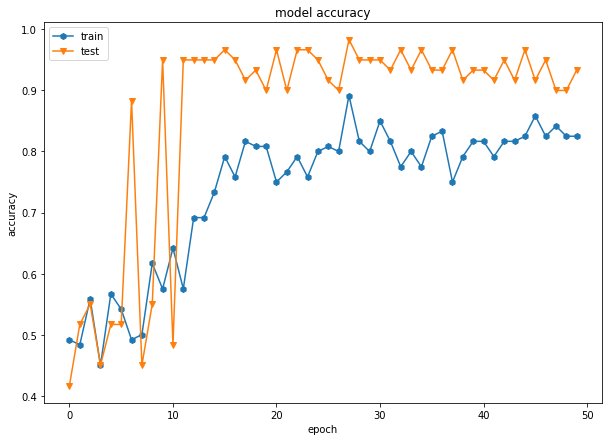

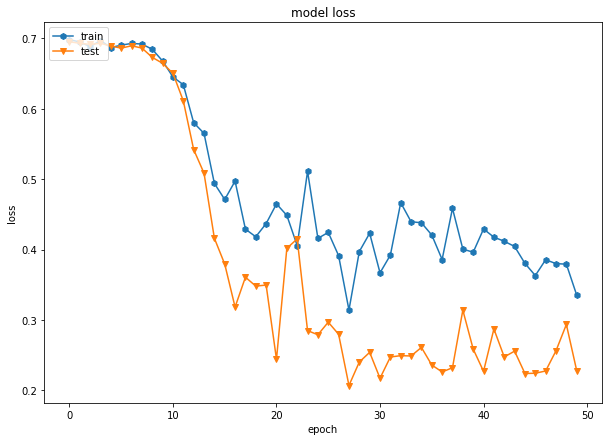

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], marker='h')
plt.plot(history.history['val_accuracy'], marker='v')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], marker='h')
plt.plot(history.history['val_loss'], marker='v')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
## Now Predict
predict_dir_path='/content/drive/MyDrive/TrainingSet/Old_DataSet _PP/Old_Classification/Test_new/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['206.jpg', '223.jpg', '227.jpg', '228.jpg', '226.jpg', '224.jpg', '221.jpg', '225.jpg', '222.jpg', '220.jpg', '219.jpg', '217.jpg', '216.jpg', '214.jpg', '212.jpg', '211.jpg', '213.jpg', '215.jpg', '218.jpg', '207.jpg', '208.jpg', '210.jpg', '209.jpg']


In [ ]:
# predicting images
from keras.preprocessing import image
cancer_counter = 0 
normal_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cancer')
        cancer_counter += 1
    else:
        print(file + ": " + 'normal')
        normal_counter += 1
print("Total Cancer :",cancer_counter)
print("Total Normal :",normal_counter)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


206.jpg: normal
223.jpg: normal
227.jpg: normal
228.jpg: normal
226.jpg: normal
224.jpg: normal
221.jpg: normal
225.jpg: normal
222.jpg: cancer
220.jpg: normal
219.jpg: normal
217.jpg: normal
216.jpg: normal
214.jpg: cancer
212.jpg: normal
211.jpg: normal
213.jpg: cancer
215.jpg: normal
218.jpg: normal
207.jpg: normal
208.jpg: normal
210.jpg: cancer
209.jpg: cancer
Total Cancer : 5
Total Normal : 18


In [ ]:
# predicting images
from keras.preprocessing import image
cancer_counter = 0 
normal_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cancer')
        cancer_counter += 1
    else:
        print(file + ": " + 'normal')
        normal_counter += 1
print("Total Cancer :",cancer_counter)
print("Total Normal :",normal_counter)

14.jpg: cancer
11.jpg: cancer
n11.jpg: normal
n23.jpg: normal
Total Cancer : 2
Total Normal : 2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# %matplotlib inline
import tensorflow as tf
import numpy as np
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

preds = model.predict(validation_generator,verbose=1)


24/24 [==============================] - 0s 16ms/step


In [ ]:
fpr , tpr , _ = roc_curve(validation_generator.classes , preds)
roc_auc = auc (fpr , tpr)



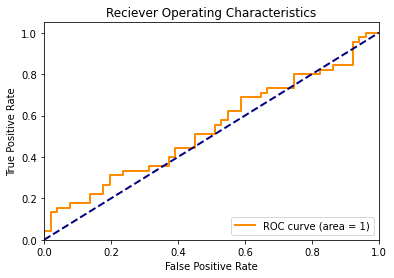

FPR:  [0.         0.         0.         0.01960784 0.01960784 0.03921569
 0.03921569 0.07843137 0.07843137 0.1372549  0.1372549  0.17647059
 0.17647059 0.19607843 0.19607843 0.23529412 0.23529412 0.31372549
 0.31372549 0.37254902 0.37254902 0.39215686 0.39215686 0.45098039
 0.45098039 0.50980392 0.50980392 0.52941176 0.52941176 0.54901961
 0.54901961 0.58823529 0.58823529 0.64705882 0.64705882 0.66666667
 0.66666667 0.74509804 0.74509804 0.82352941 0.82352941 0.8627451
 0.8627451  0.92156863 0.92156863 0.94117647 0.94117647 0.96078431
 0.96078431 1.        ]


In [ ]:
# %matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange', lw=lw,
         label = 'ROC curve (area = %0.f)' % roc_auc)
plt.plot([0 , 1], [0 , 1], color = 'navy',lw=lw, linestyle = '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc="lower right")
plt.show()
print("FPR: ",fpr)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


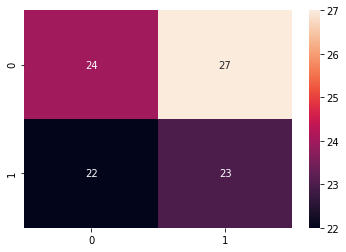

In [ ]:
prob = model.predict_generator(generator=validation_generator)

y_true = validation_generator.classes
# print(y_true)

y_pred=prob>0.5
# print(y_pred)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
mat = confusion_matrix(y_true , y_pred)
#print(mat)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true , y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

ax=plt.subplot()
sns.heatmap(cm , annot=True , ax=ax)

In [ ]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

Benign Tumor


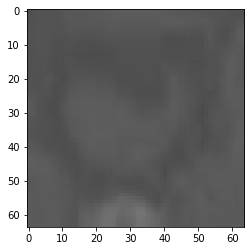

In [ ]:
path='/content/drive/MyDrive/TrainingSet/Old_DataSet _PP/Old_Classification/Test/n23.jpg'
img = image.load_img(path , target_size =(64,64))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images , batch_size = 2)
#print(classes)
if classes[0] <0.5 :
  print("Cancerous Tumor")
else:
  print("Benign Tumor")

Cancerous Tumor


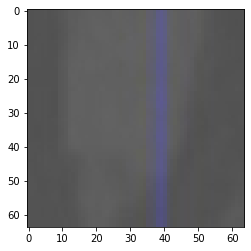

In [ ]:
path='/content/drive/MyDrive/TrainingSet/Old_DataSet _PP/Old_Classification/Test/14.jpg'
img = image.load_img(path , target_size =(64,64))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images , batch_size = 2)
#print(classes)
if classes[0] <0.5 :
  print("Cancerous Tumor")
else:
  print("Benign Tumor")